In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import load_diabetes

data = load_diabetes()

In [ ]:
x = data.data
y = data.target

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
from sklearn.linear_model import LinearRegression
L=LinearRegression()
L.fit(x_train,y_train)

LinearRegression()

In [ ]:
print(L.coef_)
print(L.intercept_)

[ 4.40039822e-01 -2.95705511e+02  4.93953581e+02  3.34079121e+02
 -7.65917671e+02  4.42007685e+02  4.94297722e+01  2.03365677e+02
  7.13916550e+02  8.00417836e+01]
153.15881733284075


In [ ]:
y_pred = L.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print("R2_Score:",r2_score(y_test,y_pred))
print("Mean_Squared_Error: ",np.sqrt(mean_squared_error(y_test,y_pred)))

R2_Score: 0.5296429111163269
Mean_Squared_Error:  51.138664121838936


In [ ]:
from sklearn.linear_model import Ridge
R = Ridge(alpha = 5)
R.fit(x_train,y_train)

Ridge(alpha=5)

In [ ]:
print(R.coef_)
print(R.intercept_)

[ 25.69458001  -8.97945414 106.80875561  76.98854203  24.04423788
  16.01089225 -67.98324159  67.61593278  98.0792916   59.39912801]
151.95252791128962


In [ ]:
y_pred1 = R.predict(x_test)

In [ ]:
print("R2 Score:",r2_score(y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred1)))

R2 Score: 0.5296429111163269
RMSE: 64.06461333668746


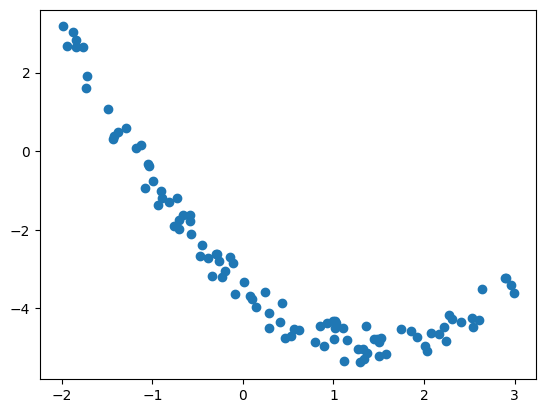

In [ ]:
m = 100
x1 = 5 * np.random.rand(m,1)-2
x2 = 0.7 * x1 ** 2 - (2*x1+3+np.random.rand(m,1))

plt.scatter(x1,x2)
plt.show()


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

<function matplotlib.pyplot.show(close=None, block=None)>

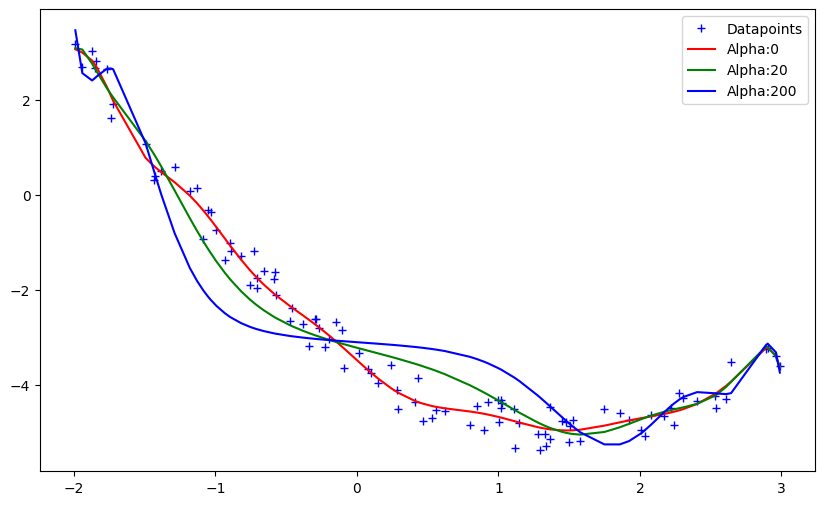

In [ ]:
def get_preds_ridge(x1,x2,alpha):
  model = Pipeline([
      ('poly_feats',PolynomialFeatures(degree=16)),
      ('ridge',Ridge(alpha=alpha))
  ])
  model.fit(x1,x2)
  return model.predict(x1)

alphas = [0,20,200]
cs = ['r','g','b']

plt.figure(figsize=(10,6))
plt.plot(x1,x2,'b+',label = "Datapoints")

for alpha , c in zip(alphas,cs):
  preds = get_preds_ridge(x1,x2,alpha)
  #Plot
  plt.plot(sorted(x1[:,0]),preds[np.argsort(x1[:,0])],c,label='Alpha:{}'.format(alpha))

plt.legend()
plt.show

In [ ]:
from sklearn.linear_model import Lasso

X = pd.DataFrame({
    'x1':[1,2,3],
    'x2':[2,4,6],
    'x3':[3,6,9],
    'x4':[0,0,0]
})
y = [10,20,30]

model = Lasso(alpha=0.1)
model.fit(X,y)
print(model.coef_)

[0.         0.         3.31666667 0.        ]


[27.14086517]
-3.3244238218415765


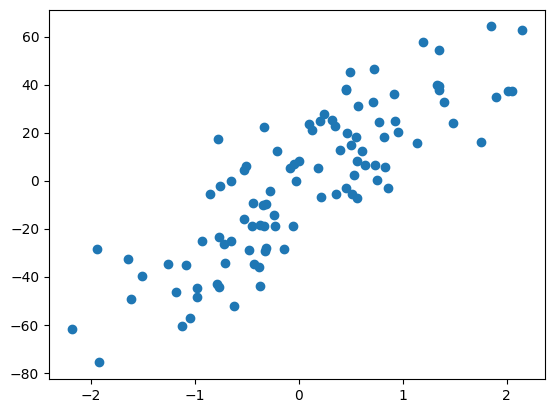

In [ ]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

X,y = make_regression(n_samples=100,n_features=1,n_informative=1,noise=20,random_state=13)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
plt.scatter(X,y)

reg = LinearRegression()
reg.fit(X_train,y_train)

print(reg.coef_)
print(reg.intercept_)



/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.001e+04, tolerance: 7.032e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent

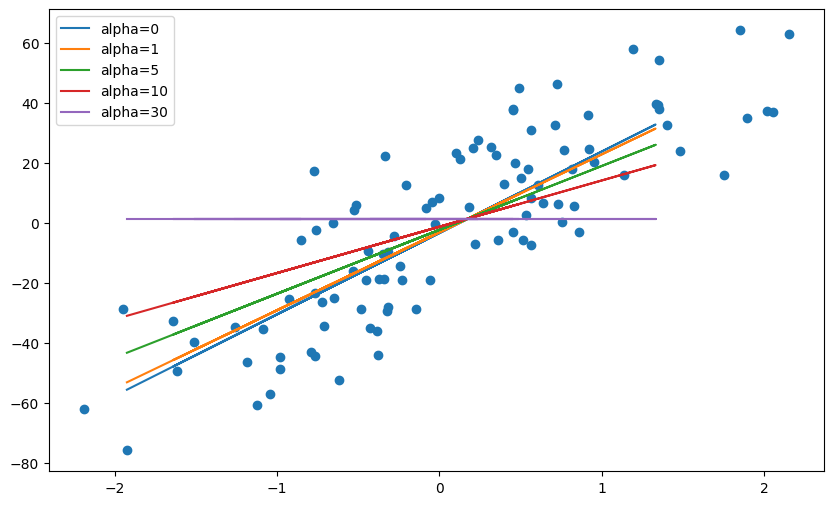

In [ ]:
alphas = [0,1,5,10,30]
plt.figure(figsize=(10,6))
plt.scatter(X,y)
for i in alphas :
  L = Lasso(alpha=i)
  L.fit(X_train,y_train)
  plt.plot(X_test,L.predict(X_test),label = 'alpha={}'.format(i))
plt.legend()
plt.show()
